In [94]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib as plt
import seaborn as sns

In [95]:
#read dataset
df = pd.read_csv('personality_datasert.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [96]:
#check 
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [97]:
#check for null values 
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [98]:
#check data types
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

Feature engineering 


In [99]:
#change the categorical variable to int
df.select_dtypes(include='object').columns

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

In [100]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression


# Label encode 'Personality' column
le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality']) #Introvert = 1 , Extrovert = 0

# One-hot encode 'Stage_fear' and 'Drained_after_socializing'
onehot_cols = ['Stage_fear', 'Drained_after_socializing']
df = pd.get_dummies(df, columns=onehot_cols)

df = df.astype(int)

df


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4,4,6,13,5,0,1,0,1,0
1,9,0,0,0,3,1,0,1,0,1
2,9,1,2,5,2,1,0,1,0,1
3,0,6,7,14,8,0,1,0,1,0
4,3,9,4,8,5,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2895,3,7,6,6,6,0,1,0,1,0
2896,3,8,3,14,9,0,1,0,1,0
2897,4,1,1,4,0,1,0,1,0,1
2898,11,1,3,2,0,1,0,1,0,1


In [101]:
#visualize the data and check correlation
corr_matrix = df.corr()
corr_matrix

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
Time_spent_Alone,1.000000,-0.717970,-0.735078,-0.701611,-0.717438,0.712467,-0.834645,0.834645,-0.832186,0.832186
Social_event_attendance,-0.717970,1.000000,0.731757,0.717773,0.726680,-0.721568,0.831188,-0.831188,0.830079,-0.830079
Going_outside,-0.735078,0.731757,1.000000,0.718467,0.755109,-0.739251,0.855403,-0.855403,0.852969,-0.852969
Friends_circle_size,-0.701611,0.717773,0.718467,1.000000,0.689448,-0.687149,0.809941,-0.809941,0.805133,-0.805133
Post_frequency,-0.717438,0.726680,0.755109,0.689448,1.000000,-0.720817,0.826057,-0.826057,0.822612,-0.822612
Personality,0.712467,-0.721568,-0.739251,-0.687149,-0.720817,1.000000,-0.847467,0.847467,-0.845388,0.845388
Stage_fear_No,-0.834645,0.831188,0.855403,0.809941,0.826057,-0.847467,1.000000,-1.000000,0.956518,-0.956518
Stage_fear_Yes,0.834645,-0.831188,-0.855403,-0.809941,-0.826057,0.847467,-1.000000,1.000000,-0.956518,0.956518
Drained_after_socializing_No,-0.832186,0.830079,0.852969,0.805133,0.822612,-0.845388,0.956518,-0.956518,1.000000,-1.000000
Drained_after_socializing_Yes,0.832186,-0.830079,-0.852969,-0.805133,-0.822612,0.845388,-0.956518,0.956518,-1.000000,1.000000


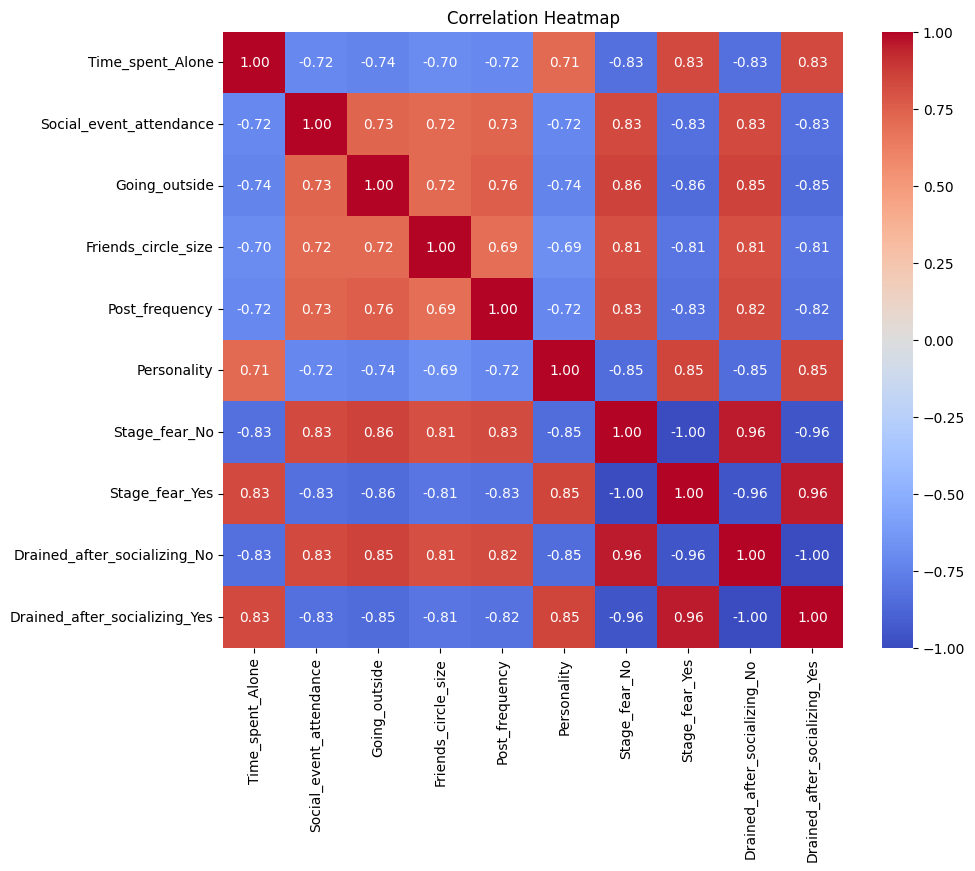

In [102]:
#heatmap of the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [103]:
#remobe columns that might off redundancy 
df.drop(columns=['Stage_fear_No', 'Drained_after_socializing_No'], inplace=True)
df.head(10)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4,4,6,13,5,0,0,0
1,9,0,0,0,3,1,1,1
2,9,1,2,5,2,1,1,1
3,0,6,7,14,8,0,0,0
4,3,9,4,8,5,0,0,0
5,1,7,5,6,6,0,0,0
6,4,9,3,7,7,0,0,0
7,2,8,4,7,8,0,0,0
8,10,1,3,0,3,1,1,1
9,0,8,6,13,8,0,0,0


In [104]:
# standardize the values 
from sklearn.preprocessing import StandardScaler

# Select columns to standardize (exclude 'Personality')
cols_to_standardize = [col for col in df.columns if col != 'Personality']

scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

df.head()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,-0.143788,0.019907,1.350613,1.592284,0.500271,0,-0.972784,-0.970772
1,1.309119,-1.371160,-1.350613,-1.479672,-0.190744,1,1.027977,1.030108
2,1.309119,-1.023393,-0.450204,-0.298151,-0.536251,1,1.027977,1.030108
3,-1.306113,0.715440,1.800817,1.828588,1.536793,0,-0.972784,-0.970772
4,-0.434369,1.758740,0.450204,0.410762,0.500271,0,-0.972784,-0.970772


In [105]:
#set parameters 

params = {
    'C': 1.0,                    # Regularization strength (inverse of alpha)
    'penalty': 'l2',             # L2 regularization (Ridge)
    'solver': 'lbfgs',           # Good solver for most cases
    'max_iter': 1000,            # Increase iterations if needed
    'random_state': 42,          # For reproducibility
    'class_weight': 'balanced'   # Handle class imbalance
}

In [106]:
#train model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( **params)

lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [107]:
#predict behavioural pattern
y_pred = lr.predict(x_test)
y_pred

y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

df = pd.DataFrame({
    'y_actual': y_test_flat,
    'y_predicted': y_pred_flat
})

df

,y_actual,y_predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
865,0,0
866,1,1
867,1,1
868,0,0


In [108]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9206896551724137

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9206896551724137
0.9121951219512195
0.918918918918919
0.9155446756425949


In [110]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[427,  36],
       [ 33, 374]])

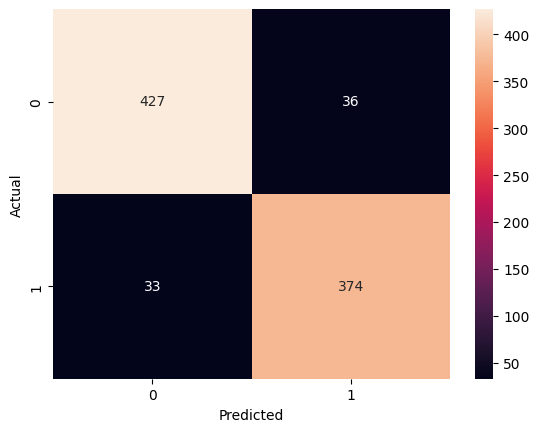

In [111]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [113]:
#Log Model to ML flow
import mlflow

mlflow.set_experiment ('First Experiment')
with mlflow.start_run(run_name='Behavioural predicition - LogR'):
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    mlflow.sklearn.log_model(lr, 'Logistic Regression')